In [1]:
library(tidytext)
library(stringr)
library(tidyverse)
library(tibble)
library(ggplot2)
library(lubridate)
library(SnowballC)

Warning message:
“package ‘tidytext’ was built under R version 3.5.1”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ readr   1.1.1
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ ggplot2 2.2.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Warning message:
“package ‘SnowballC’ was built under R version 3.5.1”

In [2]:
system('head -n 5 ../../data/bitcoinoct17tooct18/all_sorted.csv', intern = TRUE)

[1] "Tweet ID, Conversation ID, Author Id , Author Name, isVerified, DateTime, Language, Tweet Text, Replies, Retweets, Favorites, Mentions, Hashtags, Permalink, URLs, isPartOfConversation, isReply, isRetweet, Reply To User ID, Reply To User Name, Quoted Tweet ID, Quoted Tweet User Name, Quoted Tweet User ID"                                                                                                                                                                                                                     
[2] "961751652788158465,961751652788158465,903664333082828801,CryptoCoinPLife,0,2018-02-08 19:00,bg,Арбитражни операции с криптоактивами. Част 2 - Криптовалута - http://cryptocoinportal.life/news/arbitrajni-operacii-s-kriptoaktivami-chast-2.html … #litecoin #bitcoin #BitcoinCashpic.twitter.com/Jgxe2N2BJK,0,0,0,,#litecoin #bitcoin #BitcoinCashpic,/CryptoCoinPLife/status/961751652788158465,http://cryptocoinportal.life/news/arbitrajni-operacii-s-kriptoaktivami-chast-2.html,0,0,0,,,,,"                                     
[3] "961751586195193856,961751586195193856,903664333082828801,CryptoCoinPLife,0,2018-02-08 19:00,bg,Технически работата на борсата Binance удължава до утре - Криптовалута - http://cryptocoinportal.life/news/tehnicheski-rabotata-na-borsata-binance-ydljava-do-ytre-2.html … #litecoin #bitcoin #BitcoinCashpic.twitter.com/Bw9NugTA3S,0,1,0,,#litecoin #bitcoin #BitcoinCashpic,/CryptoCoinPLife/status/961751586195193856,http://cryptocoinportal.life/news/tehnicheski-rabotata-na-borsata-binance-ydljava-do-ytre-2.html,0,0,0,,,,,"
[4] "961751735629942785,961751735629942785,882240636010868736,NowBitcoinPrice,0,2018-02-08 19:00,ca,Feb 09; 2018 00:00:00 UTC | 8;237.20$ | 6;725.10€ | 5;916.70£ | #Bitcoin #btcpic.twitter.com/YX8MKUcJZq,2,0,0,,#Bitcoin #btcpic,/NowBitcoinPrice/status/961751735629942785,,0,0,0,,,,,"                                                                                                                                                                                                                                                
[5] "961751691929489408,961751691929489408,894228072832094208,falileevam4,0,2018-02-08 19:00,de,@forex @btc @fx #bitcoin KUANGCHENG ANT MINER R1 LTC miner 1.29M scrypt miner Litecoin mining machine Use an antmin https://goo.gl/XhmCqw,0,0,0,forex btc fx,#bitcoin,/falileevam4/status/961751691929489408,https://goo.gl/XhmCqw,0,0,0,,,,,"

In [3]:
system('tail -n 5 ../../data/bitcoinoct17tooct18/all_sorted.csv', intern = TRUE)

[1] "1049449114365235210,1049449114365235210,2722407241,entradeio,0,2018-10-08 19:59,en,Our #Blockchain #Energy (R)evolution meeting in #Jakarta starts in 4 hours! Register now here https://goo.gl/7bv6Er . The future of investment >< energy is here! #Entrade #renewableenergy #innovation #technology #techtrends #ico #blockchain #bitcoin #FutureReadypic.twitter.com/VIn8HGGQGM,0,9,15,,#Blockchain #Energy #Jakarta #Entrade #renewableenergy #innovation #technology #techtrends #ico #blockchain #bitcoin #FutureReadypic,/entradeio/status/1049449114365235210,https://goo.gl/7bv6Er,0,0,0,,,,,"                                                                                        
[2] "1049449198771470336,1049449198771470336,849237156010786819,otc_cyborg,0,2018-10-08 19:59,en,UK Telecoms Regulator Receives Grant to Deploy Blockchain for Telephone Number Management https://ift.tt/2Og4951 #bitcoin #blockchain #cryptocurrency #BTC #ICO #ethereum #eth #doge #xrp #ltc #crypto #fintech @BIGMONEYMIKE6 @justinsuntron #TEAMBILLIONAIRE #BMM #MONEYGANG #profi…pic.twitter.com/9qzlXrkYSC,0,0,1,BIGMONEYMIKE6 justinsuntron,#bitcoin #blockchain #cryptocurrency #BTC #ICO #ethereum #eth #doge #xrp #ltc #crypto #fintech #TEAMBILLIONAIRE #BMM #MONEYGANG #profi,/otc_cyborg/status/1049449198771470336,https://ift.tt/2Og4951,0,0,0,,,,,"                                 
[3] "1049449278194769920,1049449278194769920,808146374,AutolottoscratR,0,2018-10-08 19:59,und,#Autolottoscratchr #autolotto #worldsfirstscratchoffpen #scratchers #winnerwinnerchickendinner #scratchoffs #entrepreneur #cryptocurrency #bitcoin #lottery #scratchcards… https://www.instagram.com/p/BosQITMHHsa/?utm_source=ig_twitter_share&igshid=r4i38ggyrxg6 …,0,0,2,,#Autolottoscratchr #autolotto #worldsfirstscratchoffpen #scratchers #winnerwinnerchickendinner #scratchoffs #entrepreneur #cryptocurrency #bitcoin #lottery #scratchcards,/AutolottoscratR/status/1049449278194769920,https://www.instagram.com/p/BosQITMHHsa/?utm_source=ig_twitter_share&igshid=r4i38ggyrxg6,0,0,0,,,,,"
[4] "1049449336726122497,1049449336726122497,767253595716661248,sirarthur04,0,2018-10-08 19:59,und,#BitcoinOne #BTCONE #Bounty #Bitcoin #Ethereum #BTC #ETH #Crypto #Airdrop #Giveaway #NewBlockchain #Cryptonews #Altcoin #Coinmarketcap #Coinex #Cryptoinvest #410khttps://twitter.com/THEBITCOINONE/status/1049322470812073988 …,0,0,0,,#BitcoinOne #BTCONE #Bounty #Bitcoin #Ethereum #BTC #ETH #Crypto #Airdrop #Giveaway #NewBlockchain #Cryptonews #Altcoin #Coinmarketcap #Coinex #Cryptoinvest #410khttps,/sirarthur04/status/1049449336726122497,https://twitter.com/THEBITCOINONE/status/1049322470812073988,0,0,1,,,1049322470812073988,THEBITCOINONE,941643220508868613"                
[5] "1049449307043024896,1049449307043024896,768679436,tapatrade,0,2018-10-08 19:59,und,#bitcoin https://twitter.com/MustStopMurad/status/1022169639386836992 …,0,0,0,,#bitcoin,/tapatrade/status/1049449307043024896,https://twitter.com/MustStopMurad/status/1022169639386836992,0,0,1,,,1022169639386836992,MustStopMurad,844304603336232960"

In [4]:
tweets_df <- read.csv('../../data/bitcoinoct17tooct18/all_sorted.csv', nrow=261079)
head(tweets_df)

Tweet.ID,Conversation.ID,Author.Id,Author.Name,isVerified,DateTime,Language,Tweet.Text,Replies,Retweets,⋯,Permalink,URLs,isPartOfConversation,isReply,isRetweet,Reply.To.User.ID,Reply.To.User.Name,Quoted.Tweet.ID,Quoted.Tweet.User.Name,Quoted.Tweet.User.ID
9.617517e+17,9.617517e+17,9.036643e+17,CryptoCoinPLife,0,2018-02-08 19:00,bg,Арбитражни операции с криптоактивами. Част 2 - Криптовалута - http://cryptocoinportal.life/news/arbitrajni-operacii-s-kriptoaktivami-chast-2.html … #litecoin #bitcoin #BitcoinCashpic.twitter.com/Jgxe2N2BJK,0,0,⋯,/CryptoCoinPLife/status/961751652788158465,http://cryptocoinportal.life/news/arbitrajni-operacii-s-kriptoaktivami-chast-2.html,0,0,0,,,NA,,NA
9.617516e+17,9.617516e+17,9.036643e+17,CryptoCoinPLife,0,2018-02-08 19:00,bg,Технически работата на борсата Binance удължава до утре - Криптовалута - http://cryptocoinportal.life/news/tehnicheski-rabotata-na-borsata-binance-ydljava-do-ytre-2.html … #litecoin #bitcoin #BitcoinCashpic.twitter.com/Bw9NugTA3S,0,1,⋯,/CryptoCoinPLife/status/961751586195193856,http://cryptocoinportal.life/news/tehnicheski-rabotata-na-borsata-binance-ydljava-do-ytre-2.html,0,0,0,,,NA,,NA
9.617517e+17,9.617517e+17,8.822406e+17,NowBitcoinPrice,0,2018-02-08 19:00,ca,Feb 09; 2018 00:00:00 UTC | 8;237.20$ | 6;725.10€ | 5;916.70£ | #Bitcoin #btcpic.twitter.com/YX8MKUcJZq,2,0,⋯,/NowBitcoinPrice/status/961751735629942785,,0,0,0,,,NA,,NA
9.617517e+17,9.617517e+17,8.942281e+17,falileevam4,0,2018-02-08 19:00,de,@forex @btc @fx #bitcoin KUANGCHENG ANT MINER R1 LTC miner 1.29M scrypt miner Litecoin mining machine Use an antmin https://goo.gl/XhmCqw,0,0,⋯,/falileevam4/status/961751691929489408,https://goo.gl/XhmCqw,0,0,0,,,NA,,NA
9.617515e+17,9.617515e+17,9.550215e+17,cryptoaudio,0,2018-02-08 19:00,en,Tezos Has a New Board; But What Does It Mean for the Money? - #bitcoin #ethereum #litecoin #cryptocurrency #crypto #news #tokens #polychain capital #icos #initial coin offerings #tezos - more on @cryptoaudio https://cryptoaud.io,1,0,⋯,/cryptoaudio/status/961751515026395137,https://cryptoaud.io,0,0,0,,,NA,,NA
9.617516e+17,9.617516e+17,9.591297e+17,ADATicker,0,2018-02-08 19:00,en,#ADA Price is 0.00004333 (+0.00000002) #BTC / 0.356584 (+0.00140) #USD. Market rank is 5. #cardano #bitcoin #blockchain,2,0,⋯,/ADATicker/status/961751584937005063,,0,0,0,,,NA,,NA


In [5]:
remove_reg <- "&amp;|&lt;|&gt;"
unnest_reg  <- "([^A-Za-z_\\d#@']|'(?![A-Za-z_\\d#@]))"

tidy_tweets <- tweets_df %>% 

filter(!str_detect(Tweet.Text, "^RT")) %>%
mutate(text = str_remove_all(Tweet.Text, remove_reg)) %>%

unnest_tokens(word, text, token = "tweets") %>%
mutate(word=wordStem(word, language = 'english')) %>%

filter(!word %in% stop_words$word,
     !word %in% str_remove_all(stop_words$word, "'"),
     str_detect(word, "[a-z]"))

In [6]:
tidy_tweets$DateTime <- tidy_tweets$DateTime %>% as.Date(format = '%Y-%m-%d')
str(tidy_tweets)

'data.frame':	7847418 obs. of  24 variables:
 $ Tweet.ID              : num  9.62e+17 9.62e+17 9.62e+17 9.62e+17 9.62e+17 ...
 $ Conversation.ID       : num  9.62e+17 9.62e+17 9.62e+17 9.62e+17 9.62e+17 ...
 $ Author.Id             : num  9.04e+17 9.04e+17 9.04e+17 9.04e+17 9.04e+17 ...
 $ Author.Name           : Factor w/ 51150 levels "","_____vaL",..: 12499 12499 12499 12499 12499 12499 12499 12499 12499 35205 ...
 $ isVerified            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DateTime              : Date, format: "2018-02-08" "2018-02-08" ...
 $ Language              : Factor w/ 55 levels "","am","ar","bg",..: 4 4 4 4 4 4 4 4 4 6 ...
 $ Tweet.Text            : Factor w/ 235642 levels ""," . @CFTC Joins #SEC In Warning Against #Crypto 'Pump-and-Dumps'  : http://bit.ly/2EtAbBF @coindesk @SEC_News #r"| __truncated__,..: 230655 230655 230655 230655 233165 233165 233165 233165 233165 115499 ...
 $ Replies               : int  0 0 0 0 0 0 0 0 0 2 ...
 $ Retweets              : int  0 0 0 0 1 1

In [7]:
summary(tidy_tweets$DateTime)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2018-02-08" "2018-02-16" "2018-03-03" "2018-03-01" "2018-03-11" "2018-03-18"

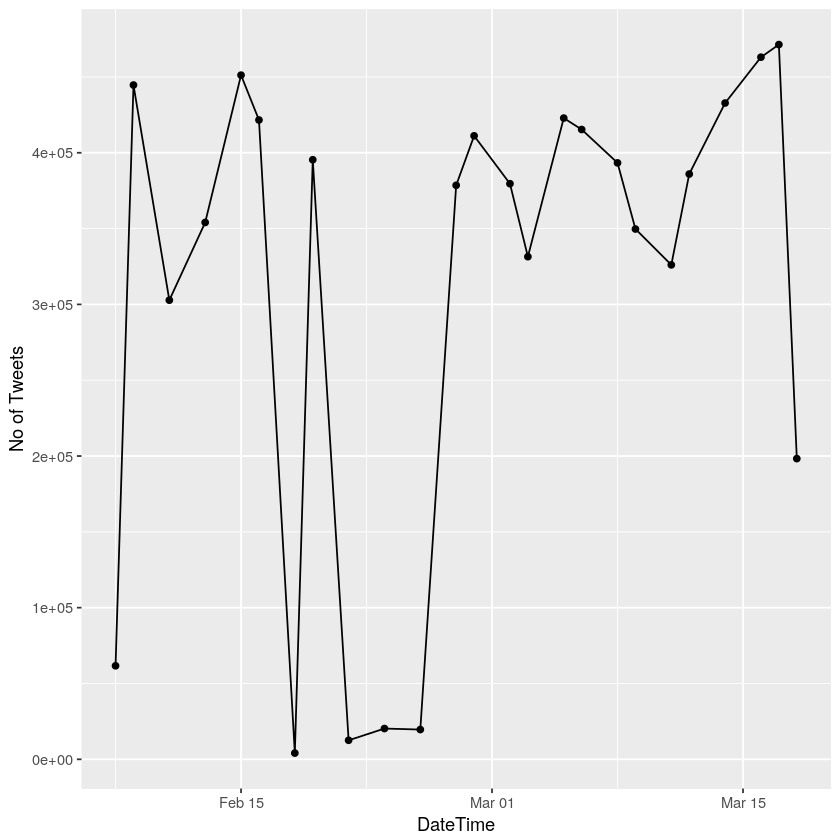

In [8]:
tidy_tweets %>% count(DateTime) %>% 
ggplot() + aes(x=DateTime, y=n) + geom_line() +geom_point() + ylab('No of Tweets')


Calculate frequency of words against each month

In [9]:
tidy_tweets_freq <- tidy_tweets %>% mutate(week = week(DateTime)) %>% group_by(week) %>% count(word, sort=TRUE) %>% 
left_join(tidy_tweets %>% mutate(week = week(DateTime)) %>% group_by(week) %>% summarize(total=n())) %>% 
mutate(freq = n/total) %>% select(week, word, freq, n, total)

Joining, by = "week"


In [10]:
tidy_tweets_freq %<>% arrange(desc(n))  %>% group_by(week) %>% top_n(freq, n=5) 
tidy_tweets_freq %>% arrange(week)

week,word,freq,n,total
6,#bitcoin,0.07196726,58229,809104
6,#cryptocurr,0.02182661,17660,809104
6,#blockchain,0.01784443,14438,809104
6,#crypto,0.01680624,13598,809104
6,#ethereum,0.01625255,13150,809104
7,#bitcoin,0.07083059,87188,1230937
7,#cryptocurr,0.02034954,25049,1230937
7,#crypto,0.01727140,21260,1230937
7,#ethereum,0.01716985,21135,1230937
7,#blockchain,0.01685545,20748,1230937


Let's convert words to columns (dimensions)

In [11]:
tidy_tweets_plot <- tidy_tweets_freq %>% select(-n,-total) %>% spread(week, freq, fill = 0) 

In [12]:
saveRDS(tidy_tweets_plot, file = 'tidy_tweets_per_week_bitcoin.rds')
tidy_tweets_plot

word,6,7,8,9,10,11
#bitcoin,0.07196726,0.07083059,0.06985806,0.07098980,0.07167728,0.07003210
#blockchain,0.01784443,0.01685545,0.01814219,0.01955718,0.02164946,0.02350562
#crypto,0.01680624,0.01727140,0.01798813,0.01898281,0.01856290,0.01935486
#cryptocurr,0.02182661,0.02034954,0.02131066,0.02212251,0.02202014,0.02482721
#ethereum,0.01625255,0.01716985,0.01766436,0.01798399,0.01924082,0.02122680


Selecting by 11


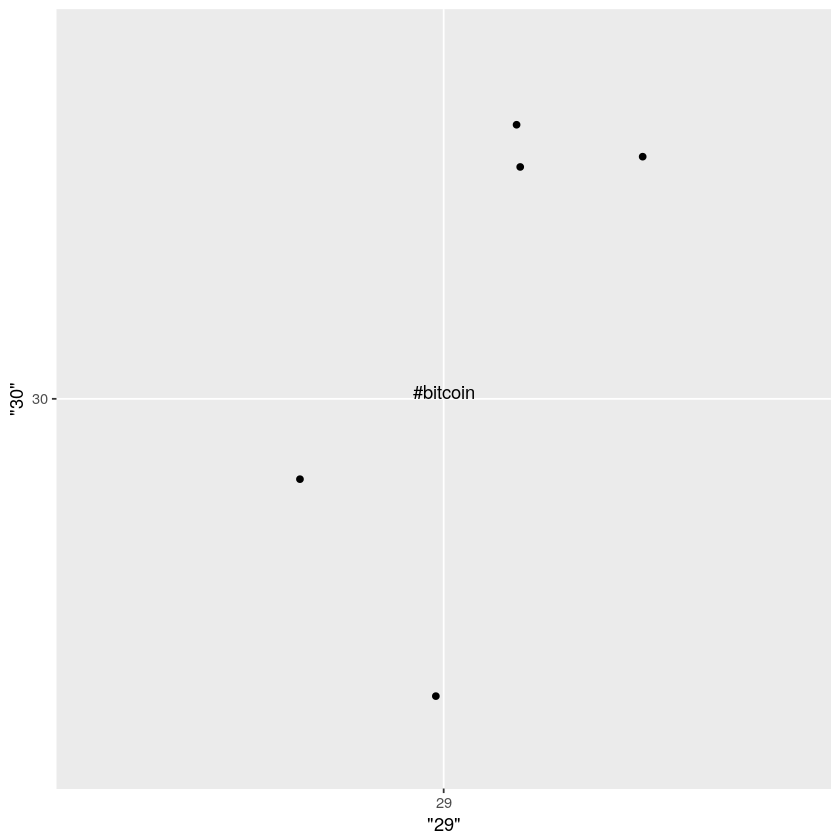

In [13]:
tidy_tweets_plot %>% top_n(n = 1000) %>% ggplot() + aes('29','30') + geom_jitter() + geom_text(aes(label = word), check_overlap = TRUE, vjust = 0)